In [1]:
# Paquetes utilizados en el análisis:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Datos utilizados en el análisis:
data = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/ICARE%20UAI%20IMCE.csv')
data['Fecha'] = pd.to_datetime(data['Fecha'], dayfirst=True)
data = data.set_index('Fecha')
data

,IMCE Comercio,IMCE Construcción,IMCE Industria,IMCE Minería,IMCE Total,IMCE Sin Minería
Fecha,,,,,,
2003-11-01,65.92,41.91,53.01,65.08,56.50,54.50
2003-12-01,64.73,55.28,51.50,68.79,58.80,56.47
2004-01-01,65.83,53.49,57.05,73.42,61.70,58.97
2004-02-01,67.52,51.88,57.10,77.64,62.64,59.15
2004-03-01,65.06,53.03,57.77,75.84,62.15,58.96
...,...,...,...,...,...,...
2020-10-01,53.77,37.69,53.07,59.84,51.68,49.79
2020-11-01,55.05,46.03,54.17,60.91,54.16,52.59
2020-12-01,56.23,41.67,49.83,39.55,48.00,49.97


In [3]:
data['IMCE (m3)'] = data['IMCE Total'].rolling(3).mean()

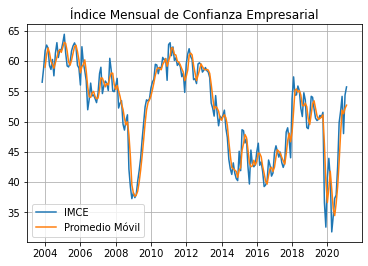

In [4]:
plt.plot(data['IMCE Total'], label='IMCE')
plt.plot(data['IMCE (m3)'], label='Promedio Móvil')
plt.title('Índice Mensual de Confianza Empresarial')
plt.legend(loc='lower left')
plt.grid()

Text(0.5, 1.0, 'Matriz de Correlaciones')

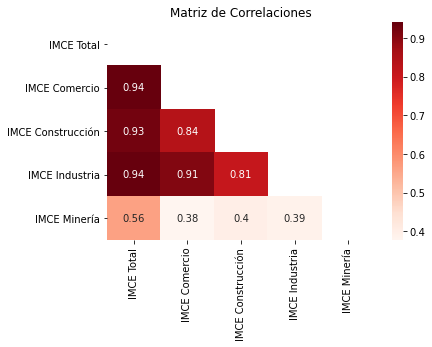

In [6]:
corr = data[['IMCE Total', 'IMCE Comercio', 'IMCE Construcción', 'IMCE Industria', 'IMCE Minería']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='Reds', annot=True, mask=mask)
plt.title('Matriz de Correlaciones')